In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

# Differetial Equations

**First Order ODEs**

Air friction while falling

$$ v' - \alpha v^2 + \beta = 0 \hspace{10mm} v(0) = 0$$

In [2]:
from scipy.integrate import odeint

All information about differential equation

In [3]:
def dvdt(v, t):
    return 3*v**2 - 5

In [4]:
v0 = 0

Solve differential equation

In [5]:
t = np.linspace(0, 1, 100)

In [6]:
sol = odeint(dvdt, v0, t)

In [7]:
sol

array([[ 0.        ],
       [-0.05047933],
       [-0.10080451],
       [-0.15082334],
       [-0.20038726],
       [-0.24935318],
       [-0.29758502],
       [-0.34495519],
       [-0.39134576],
       [-0.43664948],
       [-0.48077056],
       [-0.52362515],
       [-0.56514164],
       [-0.60526086],
       [-0.6439356 ],
       [-0.68113064],
       [-0.71682205],
       [-0.75099661],
       [-0.78365109],
       [-0.8147914 ],
       [-0.84443176],
       [-0.87259378],
       [-0.89930556],
       [-0.92460079],
       [-0.94851787],
       [-0.97109913],
       [-0.99239002],
       [-1.01243837],
       [-1.03129376],
       [-1.04900692],
       [-1.06562918],
       [-1.081212  ],
       [-1.0958066 ],
       [-1.10946355],
       [-1.12223249],
       [-1.13416195],
       [-1.14529906],
       [-1.15568941],
       [-1.16537698],
       [-1.17440397],
       [-1.18281086],
       [-1.19063623],
       [-1.19791686],
       [-1.20468768],
       [-1.21098179],
       [-1

In [8]:
v_sol = sol.T[0]

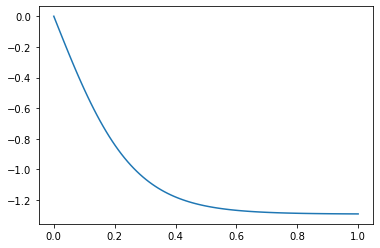

In [9]:
plt.plot(t, v_sol)

**Coupled first order ODEs**

$$ y_1' = y_1 + y_2^2 + 3x \hspace{10mm} y_1(0)=0$$
$$ y_2' = 3y_1 + y_2^3 - \cos(x) \hspace{10mm} y_2(0)=0$$

Letting $S=(y_1, y_2)$ we need to write a function that returns $dS/dx = (dy_1/dx, dy_2/dx)$. The function $dS/dx$ can take in $S=(y_1, y_2)$ and $x$

In [10]:
def dSdx(S, x):
    y1, y2 = S
    return [y1 + y2**2  + 3*x,
           3*y1 + y2**3 - np.cos(x)]

In [11]:
y1_0 = 0
y2_0 = 0
S_0 = (y1_0, y2_0)

In [12]:
x = np.linspace(0, 1, 100)

In [13]:
sol = odeint(dSdx, S_0, x)

In [14]:
sol

array([[ 0.00000000e+00,  0.00000000e+00],
       [ 1.53914062e-04, -1.00992734e-02],
       [ 6.19093356e-04, -2.01882005e-02],
       [ 1.40076629e-03, -3.02563164e-02],
       [ 2.50418953e-03, -4.02930766e-02],
       [ 3.93464633e-03, -5.02878361e-02],
       [ 5.69744401e-03, -6.02298432e-02],
       [ 7.79789517e-03, -7.01082428e-02],
       [ 1.02413187e-02, -7.99120712e-02],
       [ 1.30330245e-02, -8.96302498e-02],
       [ 1.61783065e-02, -9.92515816e-02],
       [ 1.96824391e-02, -1.08764749e-01],
       [ 2.35506573e-02, -1.18158303e-01],
       [ 2.77881638e-02, -1.27420669e-01],
       [ 3.24001125e-02, -1.36540133e-01],
       [ 3.73915921e-02, -1.45504834e-01],
       [ 4.27676179e-02, -1.54302762e-01],
       [ 4.85331404e-02, -1.62921756e-01],
       [ 5.46930282e-02, -1.71349495e-01],
       [ 6.12520553e-02, -1.79573493e-01],
       [ 6.82148995e-02, -1.87581095e-01],
       [ 7.55861308e-02, -1.95359467e-01],
       [ 8.33702071e-02, -2.02895598e-01],
       [ 9.

In [15]:
y1_sol = sol.T[0]
y2_sol = sol.T[1]

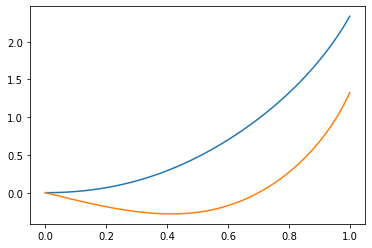

In [16]:
plt.plot(x, y1_sol)
plt.plot(x, y2_sol)

**Second Order ODEs**

Equation for a pendulum

$$\theta'' - \sin(\theta) = 0$$

Scipy can only solve coupled first order ODEs, but **any second order ODE can be turned into two coupled first order ODEs**. The same thing goes for higher order ODEs. 

Define $\omega = d\theta/dt$ so that one has the following coupled ODEs

$$d \omega / dt = \sin(\theta)$$
$$d \theta / dt = \omega $$

Let $S = (\theta, \omega)$

In [17]:
def dSdt(S, t):
    theta, omega = S
    return [omega,
           np.sin(theta)]

In [18]:
theta0 = np.pi/4
omega0 = 0

S0 = (theta0, omega0)

In [19]:
t = np.linspace(0, 20, 100)

In [20]:
sol = odeint(dSdt, S0, t)
theta, omega = sol.T

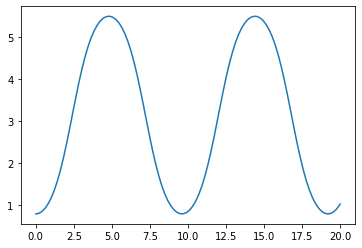

In [21]:
plt.plot(t, theta)
plt.show()

# Fourier Transforms

The discrete Fourier transform is defined as

$$y[k] = \sum_{n=0}^{N-1} e^{-2 \pi i n (k / N)} x[n] $$

* $k/N$ represents a specific frequency (dimensionless)
* can be converted to a frequency (Hz) if you know the spacing in $x$

In [22]:
x = np.linspace(0, 10*np.pi, 100)
y = np.sin(2*np.pi*x) + np.sin(4*np.pi*x) + 0.1*np.random.randn(len(x))

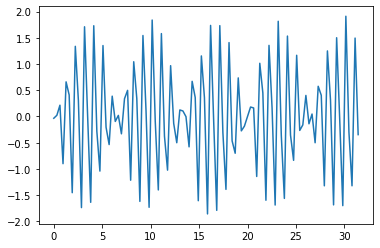

In [23]:
plt.plot(x, y)

In [24]:
from scipy.fft import fft, fftfreq

In [30]:
N = len(y)
yf = fft(y)[:N//2]
xf = fftfreq(N, np.diff(x)[0])[:N//2]

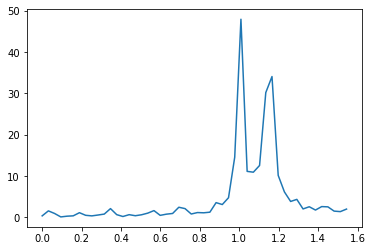

In [32]:
plt.plot(xf, np.abs(yf))
plt.show()